In [1]:
import pandas as pd

In [2]:
from tqdm import tqdm
tqdm.pandas()

In [4]:
df = pd.read_pickle('E:/results/bench.pkl')
q = pd.read_pickle('bench-df.pkl')

q = q[['rel_sent']].reset_index()

q.columns = ['question', 'rel_sent']

In [5]:
df = pd.merge(df, q, on='question', how = 'left')

In [6]:
def calculate_relevance(r, c):
    context = set(c.split())
    res = []
    for i in r:
        model = set(i.split())

        value = len(context & model) / len(context | model)
        try:
            normalized = value * (max(len(model), len(context)) / min(len(model), len(context)))
        except ZeroDivisionError:
            normalized = 0

        res.append(normalized)
    return res

df['relevance'] = df.progress_apply(lambda x: calculate_relevance(x['texts'], x['rel_sent']), axis=1)

100%|██████████| 19200/19200 [00:16<00:00, 1156.29it/s]


In [7]:
def calculate_cc(r, c, n =5):

    all_r = [set(ri.split()) for ri in r[:n]]
    all_r_1 = set()

    for r in all_r:
        all_r_1 |= r 
    c_set = set(c.split())
    try:
        return len(all_r_1 & c_set) / len(c_set)
    except ZeroDivisionError:
        return 1

df['cc'] = df.progress_apply(lambda x: calculate_cc(x['texts'], x['rel_sent'], n = 10), axis=1)

100%|██████████| 19200/19200 [00:16<00:00, 1160.03it/s]


In [8]:
def calculate_cr(r, c, n=5):

    all_r = [set(ri.split()) for ri in r[:n]]
    all_r_1 = set()

    for r in all_r:
        all_r_1 |= r 
    c_set = set(c.split())
    try:
        return len(all_r_1 & c_set) / len(all_r_1)
    except ZeroDivisionError:
        return 0
        

df['cr'] = df.progress_apply(lambda x: calculate_cr(x['texts'], x['rel_sent'], n=10), axis=1)

100%|██████████| 19200/19200 [00:16<00:00, 1165.71it/s]


In [ ]:
# df.to_pickle('E:/results/bench_rel.pkl')

In [9]:
# pattern = r"E:/indexes1/([^_]+)_(\d+)_([\d.]+)_([^_]+)_([^.]+)\.mirage_index"
pattern = r"E:/indexes2/(\d+)_([^_]+)_(\d+)_([\d.]+)_([^_]+)_([^.]+)\.mirage_index"

# Применяем регулярное выражение и создаем новые колонки
df_extracted = df["file"].str.extract(pattern)

# df_extracted.columns = ["Chunking_algorithm", "Size", "Stride", "model_name", "index_type"]
df_extracted.columns = ["index_number", "Chunking_algorithm", "Size", "Stride", "model_name", "index_type"]

# Приводим типы данных к нужным
df_extracted["Size"] = df_extracted["Size"].astype(int)
df_extracted["Stride"] = df_extracted["Stride"].astype(float)

# Объединяем с исходным DataFrame
df = pd.concat([df, df_extracted], axis=1)

In [10]:
df.columns.drop(['model_name'])

Index(['file', 'question', 'texts', 'rel_sent', 'relevance', 'cc', 'cr',
       'index_number', 'Chunking_algorithm', 'Size', 'Stride', 'index_type'],
      dtype='object')

In [11]:
df['mean_relevance'] = df.relevance.apply(lambda x: sum(x) / len(x))

In [12]:
df

,file,question,texts,rel_sent,relevance,cc,cr,index_number,Chunking_algorithm,Size,Stride,model_name,index_type,mean_relevance
0,E:/indexes2/0_W_128_0.1_intfloat_ip.mirage_index,0,[(2) years from the Effective Date...,8.1 The Company may renew this Agreem...,"[0.08123791102514506, 0.16964285714285712, 0.2...",0.583333,0.055666,0,W,128,0.1,intfloat,ip,0.165560
1,E:/indexes2/0_W_128_0.1_intfloat_ip.mirage_index,1,"[as set forth in Articles 7.1, 7.2, 8.1 and 8....",,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1.000000,0.000000,0,W,128,0.1,intfloat,ip,0.000000
2,E:/indexes2/0_W_128_0.1_intfloat_ip.mirage_index,2,"[2, this Section 10 will not be deemed to prev...",Confidentiality 8.1 Confidential Information 8...,"[0.25576468269609776, 0.2981422165278667, 0.49...",0.357542,0.136170,0,W,128,0.1,intfloat,ip,0.270364
3,E:/indexes2/0_W_128_0.1_intfloat_ip.mirage_index,3,[from the SENDER. \n\n\n CLAUSE TWENTIETH...,License Grants 7.1. Playboy Content. During...,"[0.20185868525351922, 0.2519703845235252, 0.19...",0.279621,0.120163,0,W,128,0.1,intfloat,ip,0.228684
4,E:/indexes2/0_W_128_0.1_intfloat_ip.mirage_index,4,"[intention to terminate the Contract, indicati...",Exhibit 10.1 MASTER FRANCHISE AGREEMENT This M...,"[0.03496503496503497, 0.08975012748597655, 0.0...",0.297297,0.040590,0,W,128,0.1,intfloat,ip,0.066275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,E:/indexes2/9_W_128_0.5_BAAI_l2.mirage_index,75,[and duration of the event(s) causing the fail...,Except as expressly modified by Section 1 of t...,"[0.4987212276214834, 0.33175803402646503, 0.32...",0.608696,0.033735,9,W,128,0.5,BAAI,l2,0.316136
19196,E:/indexes2/9_W_128_0.5_BAAI_l2.mirage_index,76,[operation of thecooperative business to the e...,"(1) Nanjing Tuniu Technology Co., Ltd., with i...","[1.0, 0.22289766970618033, 0.9999999999999999,...",0.515152,0.269841,9,W,128,0.5,BAAI,l2,0.412802
19197,E:/indexes2/9_W_128_0.5_BAAI_l2.mirage_index,77,[operation of thecooperative business to the e...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1.000000,0.000000,9,W,128,0.5,BAAI,l2,0.000000
19198,E:/indexes2/9_W_128_0.5_BAAI_l2.mirage_index,78,[the Support Services Agreement shall govern.\...,RIGHT OF FIRST REFUSAL; TAG-ALONG RIGHTS. Prio...,"[0.7889554224883566, 0.21625416886080392, 0.18...",0.694805,0.201507,9,W,128,0.5,BAAI,l2,0.271590


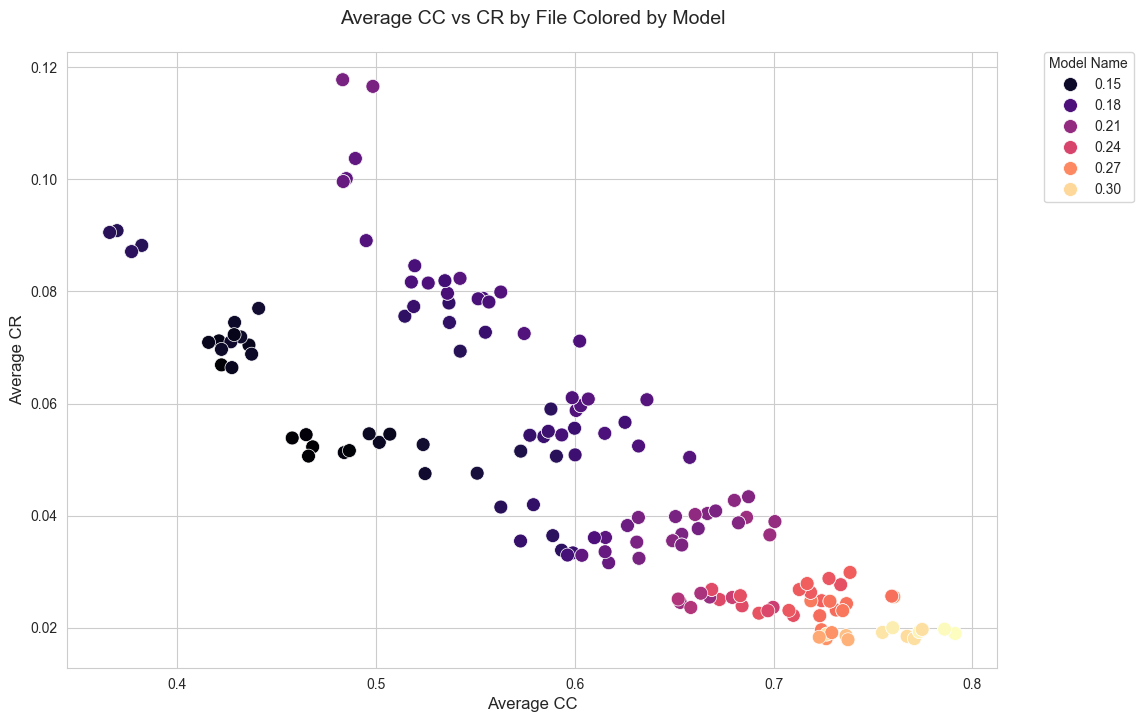

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

# Группируем данные по файлу и вычисляем средние значения
grouped_df = df.groupby('file').agg({
    'cc': 'mean',
    'cr': 'mean',
    'model_name': 'first',
    'mean_relevance': 'mean'
}).reset_index()

# Создаем график
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Стиль с сеткой

# Точечный график с цветовой палитрой magma
scatter = sns.scatterplot(
    data=grouped_df,
    x='cc',
    y='cr',
    hue='mean_relevance',
    palette='magma',
    s=100,  # Размер точек
    edgecolor='w',  # Белая обводка точек
    linewidth=0.5
)

# Настройка подписей и заголовка
plt.xlabel('Average CC', fontsize=12)
plt.ylabel('Average CR', fontsize=12)
plt.title('Average CC vs CR by File Colored by Model', fontsize=14, pad=20)

# Размещение легенды
plt.legend(
    title='Model Name',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

# Оптимизация расположения элементов
# plt.tight_lay

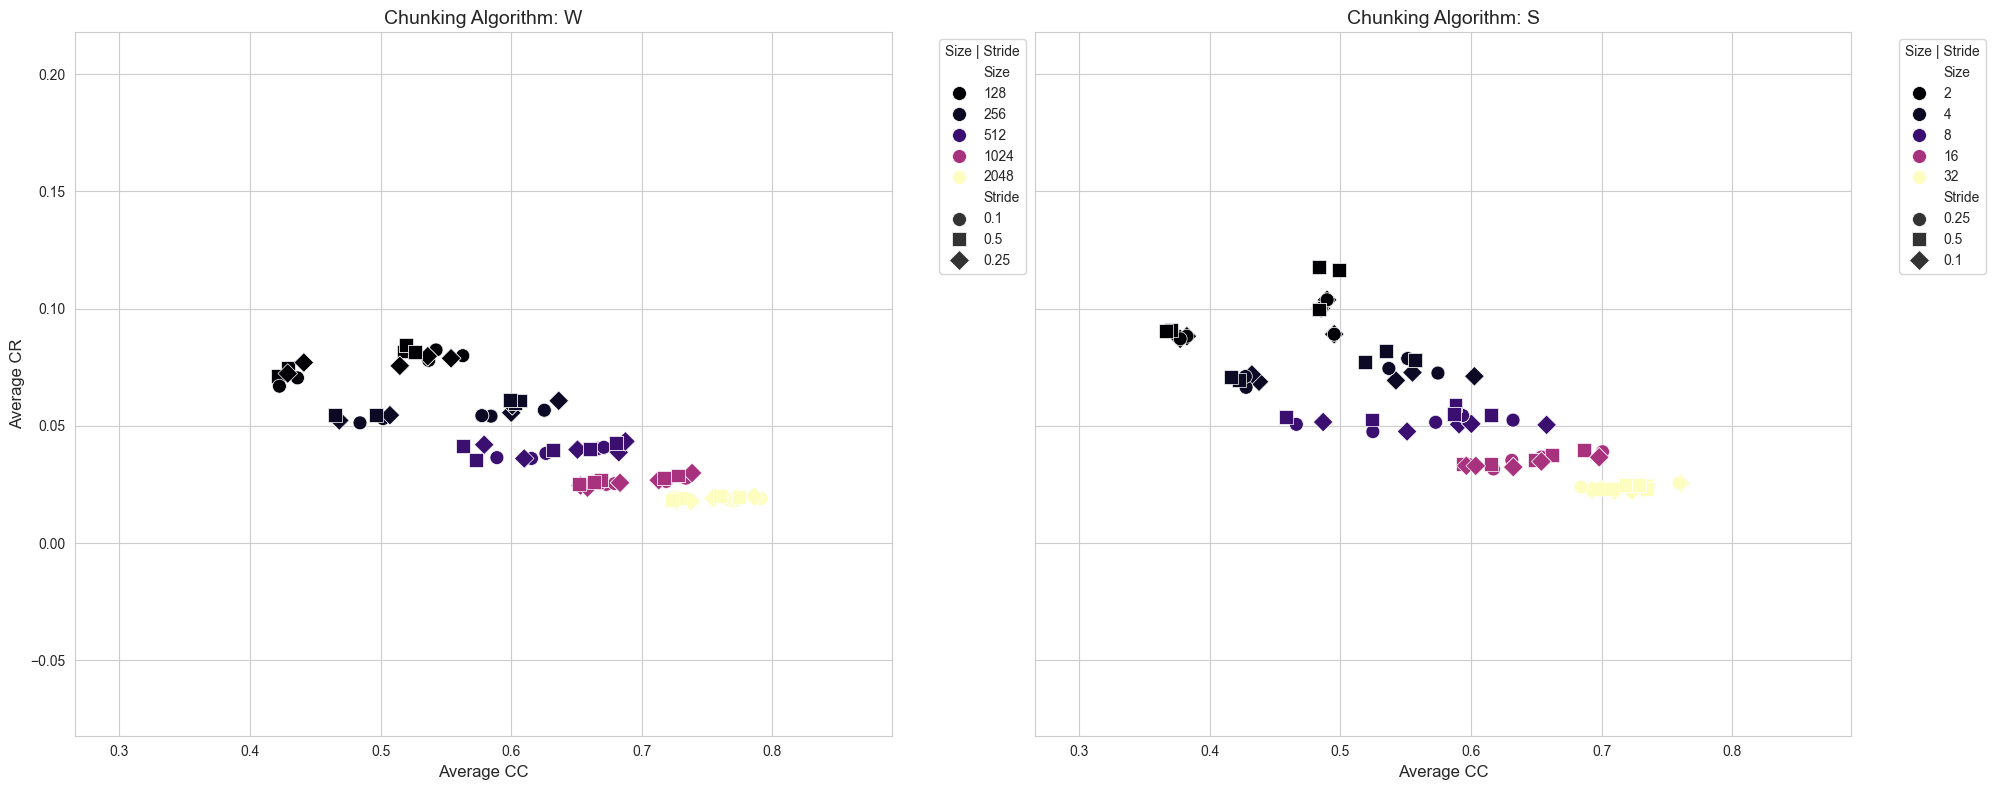

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Агрегация данных по файлам
grouped = df.groupby('file').agg({
    'cc': 'mean',
    'cr': 'mean',
    'Chunking_algorithm': 'first',
    'Size': 'first',
    'Stride': 'first'
}).reset_index()

# 2. Преобразуем Stride в категорию для дискретных форм
grouped['Stride'] = grouped['Stride'].astype(str)

# 3. Разделяем данные по алгоритмам
df_w = grouped[grouped['Chunking_algorithm'] == 'W']
df_s = grouped[grouped['Chunking_algorithm'] == 'S']

# 4. Определяем общие границы осей
x_min = min(grouped['cc'].min(), grouped['cc'].min()) - 0.1
x_max = max(grouped['cc'].max(), grouped['cc'].max()) + 0.1
y_min = min(grouped['cr'].min(), grouped['cr'].min()) - 0.1
y_max = max(grouped['cr'].max(), grouped['cr'].max()) + 0.1

# 5. Настройка графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)
sns.set_style("whitegrid")
marker_styles = ['o', 's', 'D', '^', 'v', 'p', '*']

# 6. График для W
sns.scatterplot(
    data=df_w,
    x='cc',
    y='cr',
    hue='Size',
    style='Stride',
    palette='magma',
    markers=marker_styles[:len(df_w['Stride'].unique())],
    s=100,
    edgecolor='w',
    linewidth=0.5,
    ax=ax1
)
ax1.set_title('Chunking Algorithm: W', fontsize=14)
ax1.set(xlim=(x_min, x_max), ylim=(y_min, y_max))  # Фиксируем масштаб
ax1.set_xlabel('Average CC', fontsize=12)
ax1.set_ylabel('Average CR', fontsize=12)

# 7. График для S
sns.scatterplot(
    data=df_s,
    x='cc',
    y='cr',
    hue='Size',
    style='Stride',
    palette='magma',
    markers=marker_styles[:len(df_s['Stride'].unique())],
    s=100,
    edgecolor='w',
    linewidth=0.5,
    ax=ax2
)
ax2.set_title('Chunking Algorithm: S', fontsize=14)
ax2.set(xlim=(x_min, x_max), ylim=(y_min, y_max))  # Фиксируем масштаб
ax2.set_xlabel('Average CC', fontsize=12)
ax2.set_ylabel('')  # Общая ось Y уже подписана

# 8. Общая настройка
for ax in [ax1, ax2]:
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        title='Size | Stride'
    )

plt.tight_layout()
plt.show()